#`Outlier Analysis`

##`What is an Outlier?`
##`Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.let’s take an example to check what happens to a data set with and data set without outliers.`
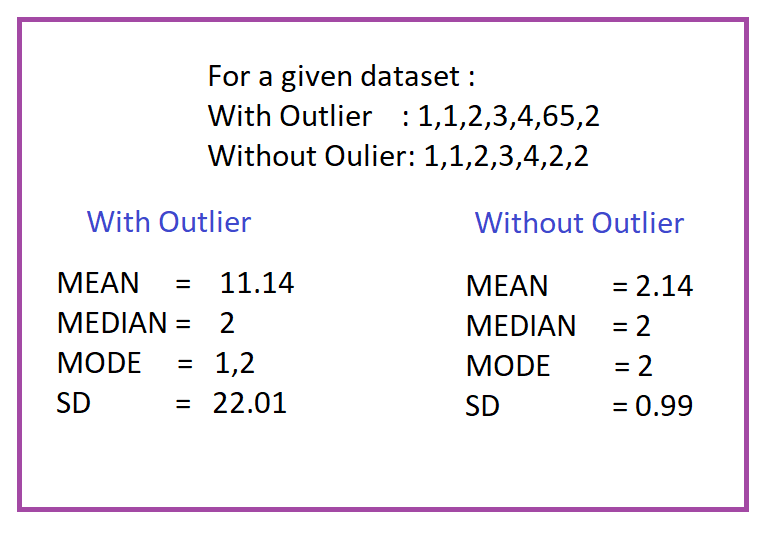

##`As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 2.14. But with the outlier, average soars to 11.14. This would change the estimate completely.`

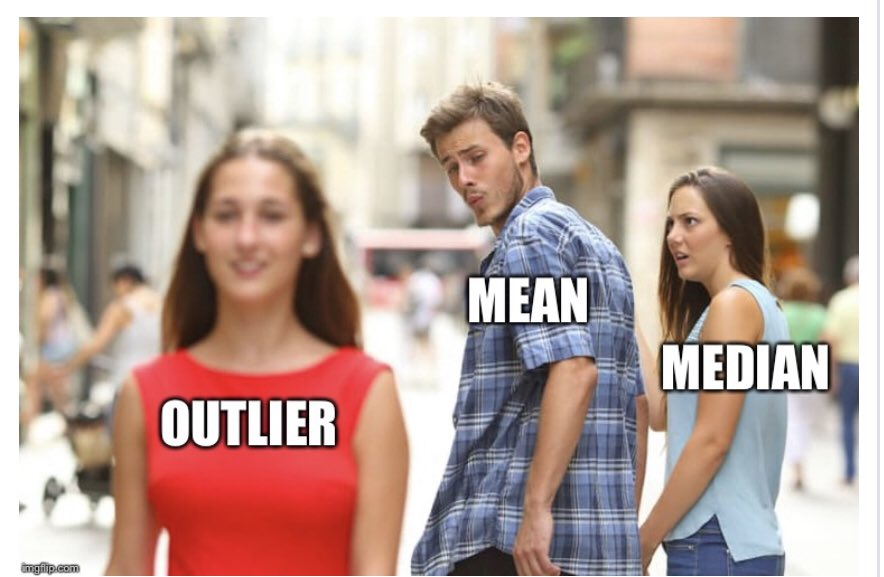

##`The above meme makes you better understanding of outlier.`

##`Lets take a real world example. In a company of 50 employees, 45 people having monthly salary of Rs.6,000, 5 senior employees having monthly salary of Rs.100000 each. If you calculate the average monthly salary of employees in the company is Rs.14,500, which will give you the wrong conclusion (majority of employees have lesser than 14.5k salary). But if you take median salary, it is Rs.6000 which is more sense than the average.For this reason median is appropriate measure than mean. Here you can see the effect of outlier.`

In [ ]:
import numpy as np

def salary_analysis(salaries):
    # Calculate average salary
    average_salary = np.mean(salaries)

    # Calculate median salary
    median_salary = np.median(salaries)

    return average_salary, median_salary

# Example data: 45 employees with Rs. 6,000 and 5 senior employees with Rs. 100,000
salaries = [6000] * 45 + [100000] * 5

# Perform salary analysis
average, median = salary_analysis(salaries)

print(f"Average Salary: Rs. {average:.2f}")
print(f"Median Salary: Rs. {median:.2f}")


Average Salary: Rs. 15400.00
Median Salary: Rs. 6000.00


##`Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.`

##`Cause for outliers`
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

##`Different outlier detection technique.`
1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method(Percentile Capping)
6. DBSCAN Clustering
7. Visualizing the data
8. IQR Method

##`1. Hypothesis Testing(grubbs test)`
Grubbs' test is defined for the hypothesis:  
`Ho:  There are no outliers in the data set`

`H1: There is exactly one outlier in the data set`

The Grubbs' test statistic is defined as: `Gcalculated=max(x-X)/SD` with X and SD denoting the sample mean and standard deviation, respectively.

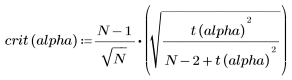

##`If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier `



In [ ]:
import numpy as np
import scipy.stats  as s
x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
  n=len(x)
  mean=np.mean(x)
  std=np.std(x)
  t_value=s.t.ppf(1 - 0.05 / (2 * n), n - 2)
  G_calculated=max(abs(x-mean))/std
  print(f'Grubbs Calculated Value:{G_calculated}')
  grubbs_test_critical_value=((n-1)/np.sqrt(n))*(np.sqrt(t_value/(n-2+t_value)))
  print(f'Grubbs Critical Value:{grubbs_test_critical_value}')
  if grubbs_test_critical_value > G_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
  else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")


In [ ]:
grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value:1.4274928542926593
Grubbs Critical Value:1.511172413347165
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value:2.2765147221587774
Grubbs Critical Value:1.549830410616053
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [15]:
train=pd.read_csv('/content/T.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
grubbs_test(train['LotArea'])

Grubbs Calculated Value:20.51827315777325
Grubbs Critical Value:2.0357671307352048
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



#`2. Z-score method`
##`Using Z score method,we can find out how many standard deviations value away from the mean.`

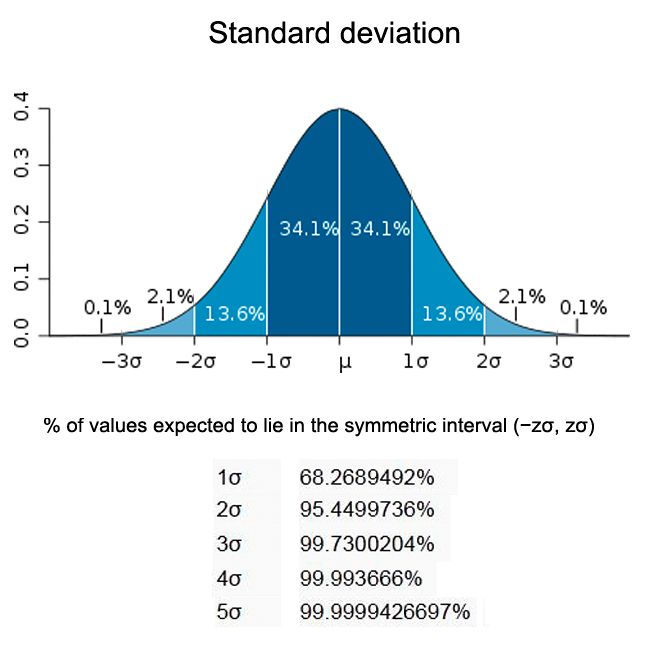

##`Figure in the left shows area under normal curve and how much area that standard deviation covers.`
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

###`Z_score_formula=X-mean/std`

`If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.`

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
train=pd.read_csv('/content/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
outliers=[]
def Z_test_for_outliers(df):
  mean=df.mean()
  std=df.std()
  for i in df:
    Z_score=(i-mean)/std
    if np.abs(Z_score) >3:
      outliers.append(i)
  print(outliers)
Z_test_for_outliers(train['SalePrice'])
print(f'Number of outliers:{len(outliers)}')

[438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]
Number of outliers:22


In [ ]:
Z_test_for_outliers(train['LotArea'])
print(f'Number of outliers:{len(outliers)}')

[438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500, 50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]
Number of outliers:35


##`Outlier Detection Using IQR Method`

####`What is the IQR Method?`

`The Interquartile Range (IQR) is the range between the first quartile (Q1) and the third quartile (Q3) of a dataset, representing the middle 50% of the data.
Outliers are data points that fall outside a range determined by 1.5 times the IQR from the first and third quartiles.`

###`The formula for detecting outliers is:`

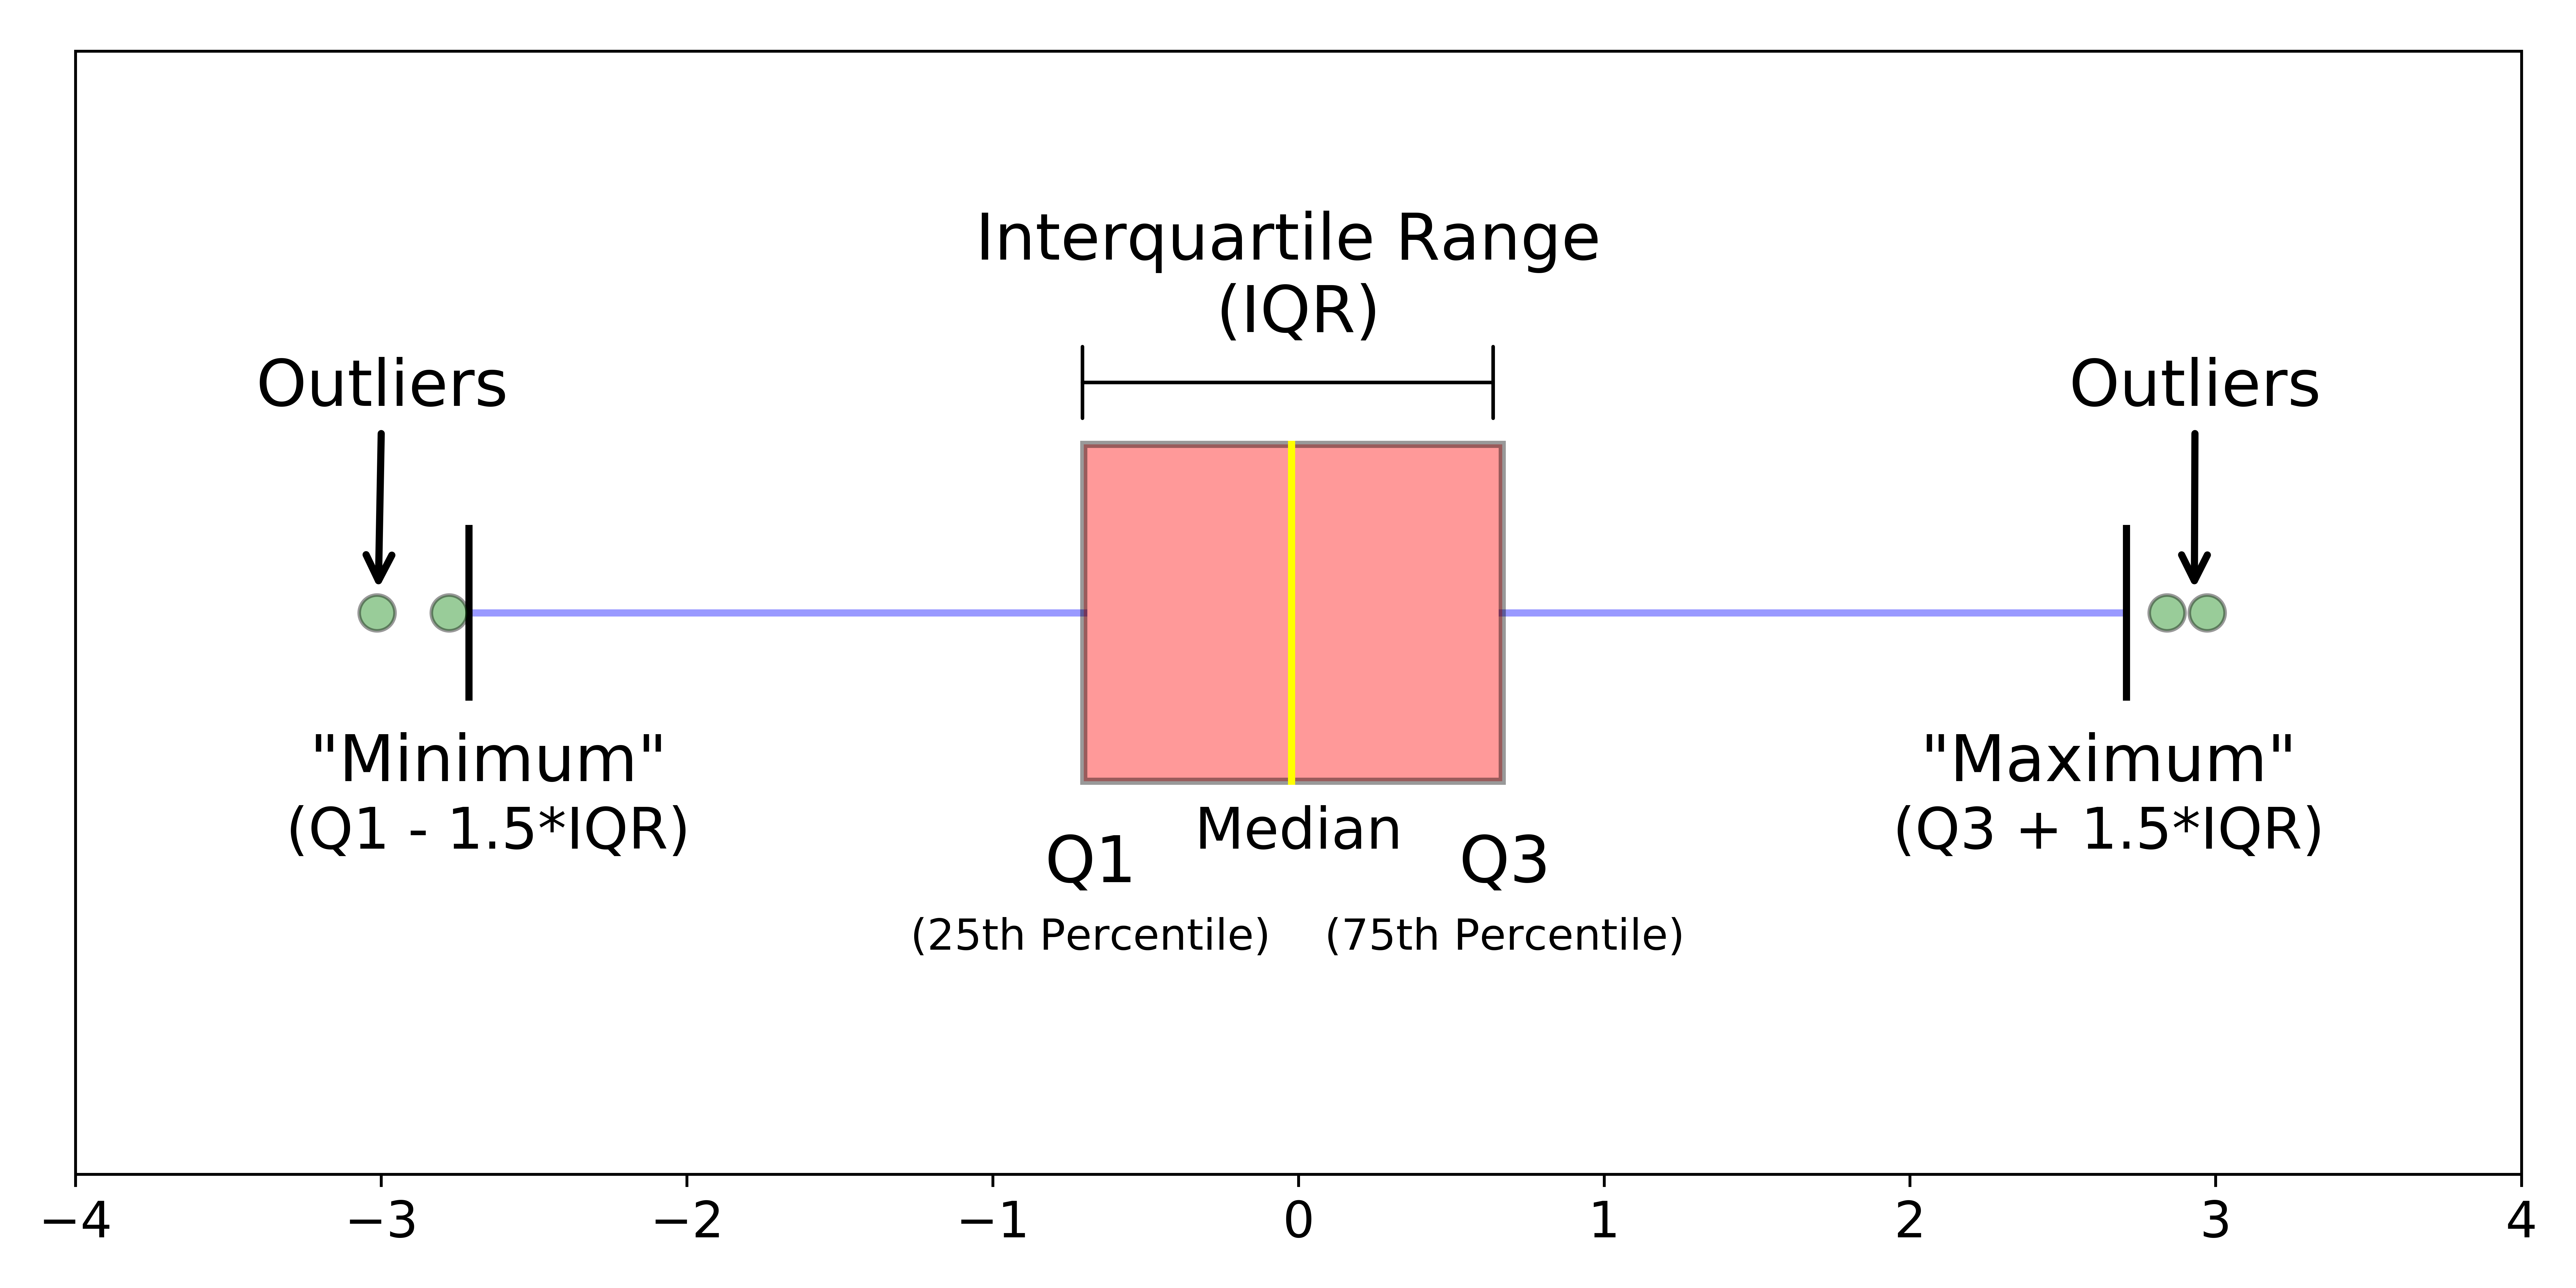


`lower_Bound=Q3-1.5*IQR
Upper_Bound=Q3+1.5*IQR`

`Data points below the lower bound or above the upper bound are classified as outliers.`

In [ ]:
def detect_outliers_iqr(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    return outliers

In [ ]:
outliers=detect_outliers_iqr(train['LotArea'])
print(f"Outliers: {outliers}")
print(f'Number of outliers:{len(outliers)}')

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]
Number of outliers:69


In [ ]:
outliers=detect_outliers_iqr(train['SalePrice'])
print(f"Outliers: {outliers}")
print(f'Number of outliers:{len(outliers)}')

Outliers: [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 394617]
Number of outliers:61


#`Robust Z-score`

##`It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median.`

###`Robust Z-score formula`

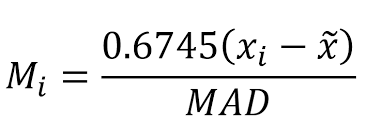

`Suppose x follows a standard normal distribution. The MAD will converge to the median of the half normal distribution, which is the 75% percentile of a normal distribution, and N(0.75)≃0.6745.`

In [ ]:
outliers=[]
def Z_robust_test_for_outliers(df):
  median=df.median()
  mad=s.median_abs_deviation(df)
  for i in df:
    Z=(0.6745*(i-median))/(np.median(mad))
    if np.abs(Z) >3:
      outliers.append(i)
  print(outliers)

In [ ]:
Z_robust_test_for_outliers(train['SalePrice'])
print(f'Number of outliers:{len(outliers)}')

[345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 340000, 394432, 426000, 339750, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 335000, 361919, 341000, 337000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 336000, 395192, 348000, 337500, 556581, 335000, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 335000, 333168, 410000, 466500, 377500, 340000, 394617]
Number of outliers:71


In [ ]:
Z_robust_test_for_outliers(train['LotArea'])
print(f'Number of outliers:{len(outliers)}')

[345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 340000, 394432, 426000, 339750, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 335000, 361919, 341000, 337000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 336000, 395192, 348000, 337500, 556581, 335000, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 335000, 333168, 410000, 466500, 377500, 340000, 394617, 50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 25286, 27650, 24090, 25000, 21286, 21750, 29959, 23257, 35760, 35133, 32463, 18890, 24682, 23595, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 

#`Winsorization Method(Percentile Capping)`

####`This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.`

In [ ]:
outlier=[]
def Percentile_Capping_test(df):
  q1=np.percentile(df,1)
  q99=np.percentile(df,99)
  for i in df:
      if i<q1 or i>q99:
        outlier.append(i)
  print(outlier)

In [ ]:
Percentile_Capping_test(train['LotArea'])
print(f'Number of outliers:{len(outlier)}')

[50271, 1596, 159000, 39104, 215245, 164660, 53107, 70761, 53227, 1526, 40094, 1491, 46589, 115149, 53504, 45600, 1300, 1533, 1477, 63887, 57200, 1533]
Number of outliers:22


In [ ]:
Percentile_Capping_test(train['SalePrice'])
print(f'Number of outliers:{len(outlier)}')

[50271, 1596, 159000, 39104, 215245, 164660, 53107, 70761, 53227, 1526, 40094, 1491, 46589, 115149, 53504, 45600, 1300, 1533, 1477, 63887, 57200, 1533, 40000, 501837, 475000, 61000, 60000, 555000, 34900, 446261, 39300, 451950, 60000, 755000, 55000, 52000, 538000, 485000, 582933, 55993, 611657, 35311, 37900, 556581, 60000, 625000, 745000, 465000, 55000, 52500, 466500, 58500]
Number of outliers:52


In [62]:
import pandas as pd
train_titanic=pd.read_csv('/content/train.csv')

In [ ]:
train_titanic['Fare']=train_titanic['Fare'].astype(int)

In [ ]:
Percentile_Capping_test(train_titanic['Fare'])
print(f'Number of outliers:{len(outlier)}')

[50271, 1596, 159000, 39104, 215245, 164660, 53107, 70761, 53227, 1526, 40094, 1491, 46589, 115149, 53504, 45600, 1300, 1533, 1477, 63887, 57200, 1533, 40000, 501837, 475000, 61000, 60000, 555000, 34900, 446261, 39300, 451950, 60000, 755000, 55000, 52000, 538000, 485000, 582933, 55993, 611657, 35311, 37900, 556581, 60000, 625000, 745000, 465000, 55000, 52500, 466500, 58500, 263, 263, 512, 262, 263, 263, 512, 512, 262]
Number of outliers:61


#`DBSCAN (Density-Based Spatial Clustering of Applications with Noise)`
DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers. Here cluster -1 indicates that the cluster contains outlier and rest of clusters have no outliers. This approch is similar to the K-mean clustering. There are two parameters required for DBSCAN. DBSCAN give best result for multivariate outlier detection.

1. epsilon: a distance parameter that defines the radius to search for nearby neighbors.
2. minimum amount of points required to form a cluster.

Using epsilon and minPts, we can classify each data point as:

Core point –> a point that has at least a minimum number of other points (minPts) within its radius.

Border point –> a point is within the radius of a core point but has less than the minimum number of other points (minPts) within its own radius.

Noise point –> a point that is neither a core point or a border point

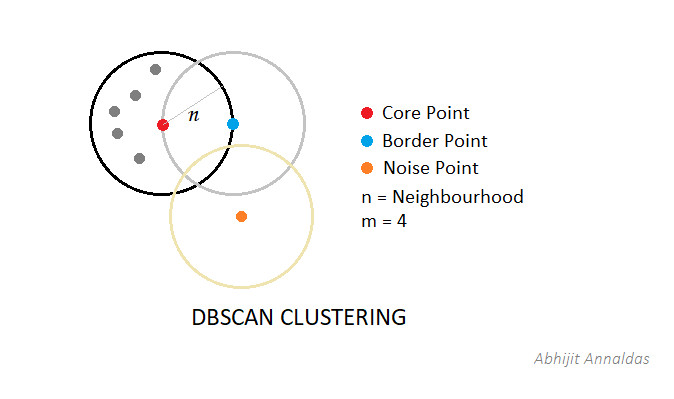

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

def run_dbscan(df):
    # Apply DBSCAN
    dbscan = DBSCAN(eps=2, metric='euclidean', min_samples=5)
    cluster_fit = dbscan.fit_predict(df.values.reshape(-1,1))

    # Add the cluster labels to a DataFrame
    result_df = pd.DataFrame()
    result_df['cluster'] = cluster_fit

    # Display cluster counts
    print(result_df['cluster'].value_counts().sort_values(ascending=False))

In [ ]:
run_dbscan(train_titanic['Fare'])

cluster
 0    705
 2     57
 1     48
-1     28
 4     15
 5     10
 8      8
 6      7
 7      7
 3      6
Name: count, dtype: int64


In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
train_titanic=pd.read_csv('/content/train.csv')

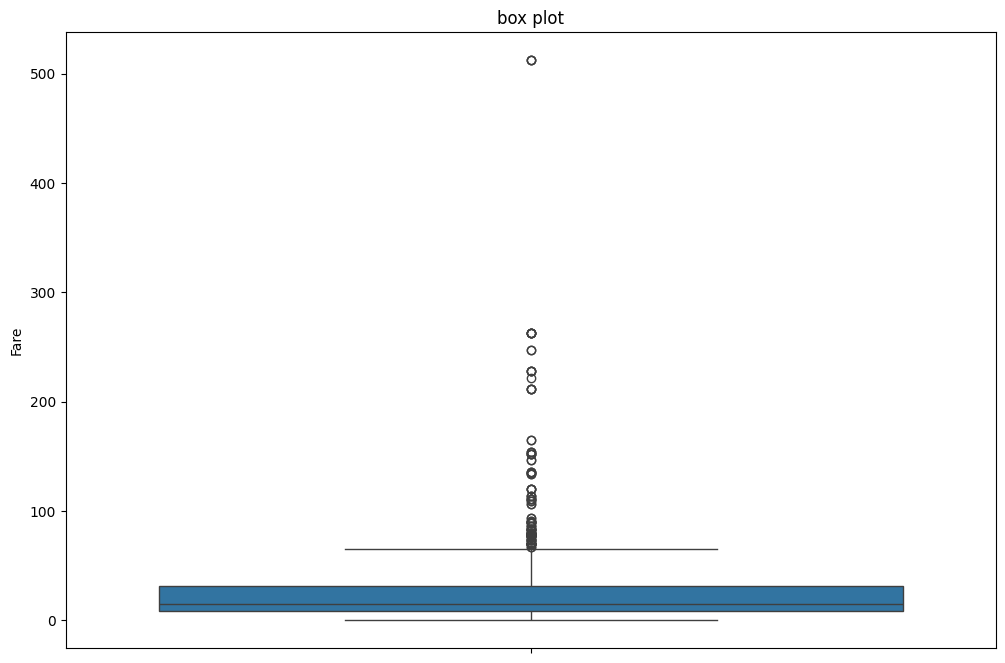

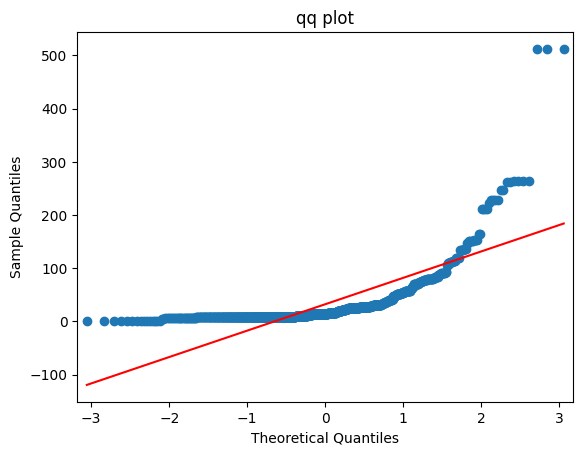

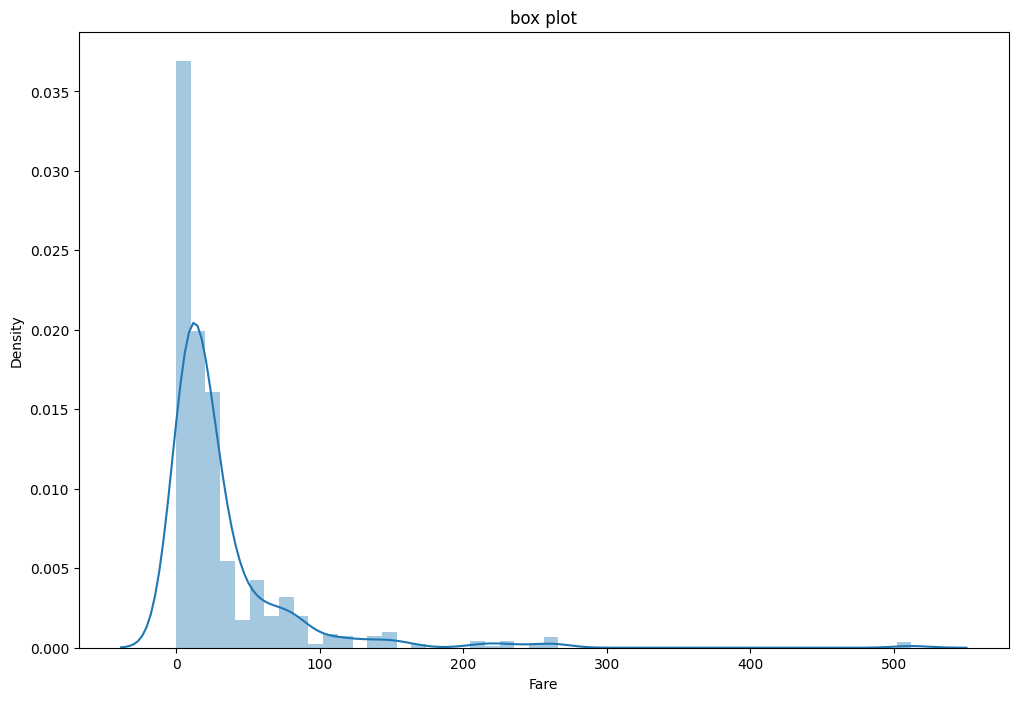

In [ ]:
def boxplot(df):
  plt.figure(figsize=(12,8))
  sns.boxplot(df)
  plt.title(f'box plot')
  plt.show()
boxplot(train_titanic['Fare'])

def scatterplot(df):
  fig=px.scatter(df,x='Age',y='Fare',color='Pclass',title='scatter plot',size='Fare')
  fig.show()
scatterplot(train_titanic)

def histplot(df):
  fig=px.histogram(df,x='Fare',color='Pclass',title='hist plot')
  fig.show()
histplot(train_titanic)

def qqplot(df):
  sm.qqplot(df,line='s')
  plt.title('qq plot')
  plt.show()
qqplot(train_titanic['Fare'])

def boxplot(df):
  plt.figure(figsize=(12,8))
  sns.distplot(df)
  plt.title(f'box plot')
  plt.show()
boxplot(train_titanic['Fare'])

#`What Next??`
After detecting the outlier we should remove\treat the outlier because it is a silent killer!! yes.
* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.

1. Deleting observations.
2. Transforming values.
3. Imputation.
4. Separately treating

#`Deleting observations:`
We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.

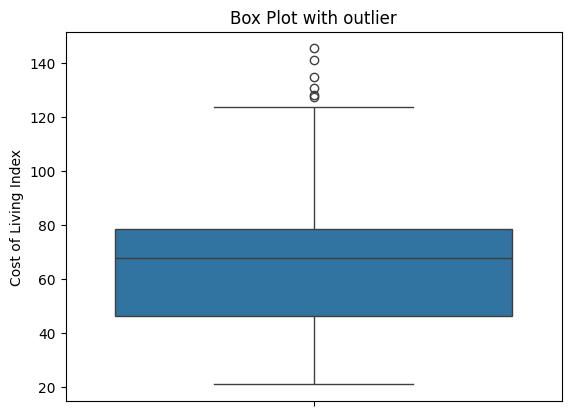

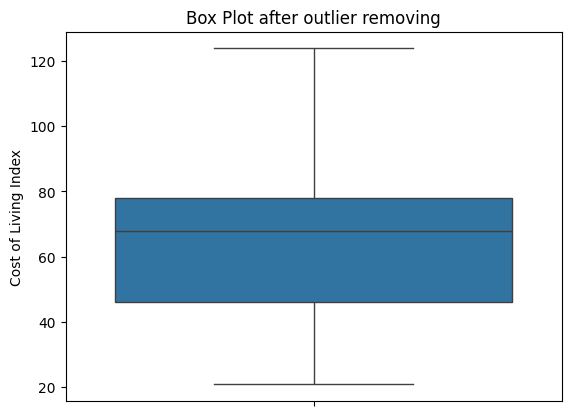

In [ ]:
import numpy as np
train=pd.read_csv('/content/cost-of-living-2018.csv')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot with outlier")
plt.show()
def drop_outliers(df, field_name):
  q1_smaller = np.percentile(df[field_name], 25) - (1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25)))
  q3_greater = np.percentile(df[field_name], 75) + (1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25)))
  df.drop(df[df[field_name] < q1_smaller].index, inplace=True)
  df.drop(df[df[field_name] > q3_greater].index, inplace=True)
drop_outliers(train,'Cost of Living Index')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot after outlier removing")
plt.show()

#`Transforming values:`
Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.
1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation
* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make your data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods.
* In all these method boxcox transformation gives the best result.

In [ ]:
train

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
6,"Reykjavik, Iceland",123.78,57.25,91.70,118.15,133.19,88.95
7,"Stavanger, Norway",118.61,39.83,80.61,106.09,143.54,118.14
8,"Lugano, Switzerland",118.24,52.91,86.73,117.74,122.30,119.86
9,"Oslo, Norway",117.23,49.28,84.46,112.42,124.09,102.94
10,"Trondheim, Norway",114.22,42.39,79.58,103.50,134.76,108.29
...,...,...,...,...,...,...,...
535,"Kochi, India",24.65,6.31,15.80,26.93,13.94,77.70
536,"Coimbatore, India",24.61,5.35,15.32,25.23,15.21,53.23
537,"Alexandria, Egypt",23.78,4.34,14.40,23.19,17.66,23.75
538,"Navi Mumbai, India",23.44,6.25,15.15,24.02,14.14,111.99


In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler as ss
fig=px.histogram(train,x='Cost of Living Index',title='histogram before StandardScalertransformation')
fig.show()
scaler=ss()
train['Cost_of_Living_Index']=scaler.fit_transform(train['Cost of Living Index'].values.reshape(-1,1))
fig=px.histogram(train,x='Cost_of_Living_Index',title='histogram after StandardScalertransformation')
fig.show()

In [ ]:
train.isna().sum()

,0
City,0
Cost of Living Index,0
Rent Index,0
Cost of Living Plus Rent Index,0
Groceries Index,0
Restaurant Price Index,0
Local Purchasing Power Index,0
Cost_of_Living_Index,0


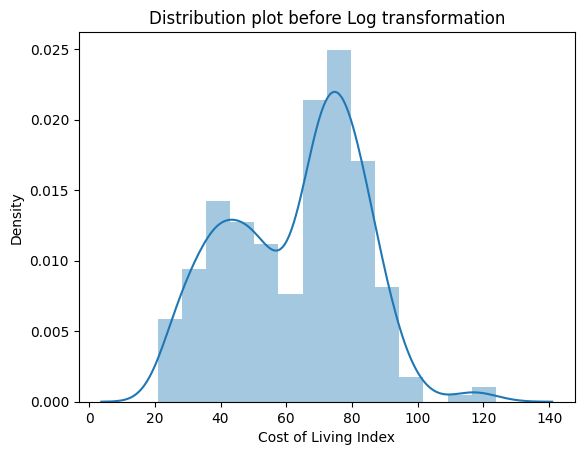

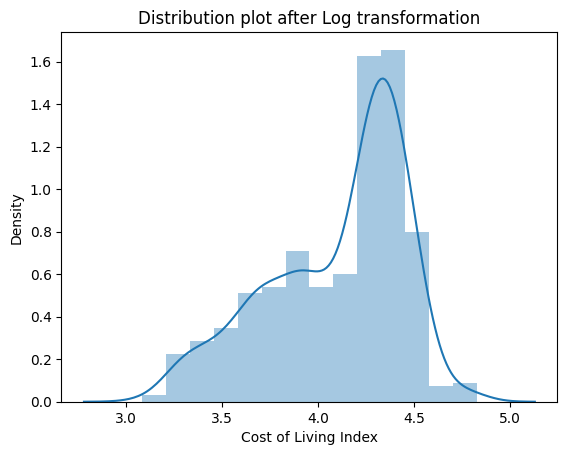

In [ ]:
# log transformation
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot before Log transformation")
plt.show()
train['Cost of Living Index']=np.log1p(train['Cost of Living Index'])
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot after Log transformation")
plt.show()

In [3]:
import plotly.express as px
import pandas as pd

# Assuming 'train_titanic' is your DataFrame and 'Fare' is the column you're working with.

# Cube root transformation
train_titanic['Fare'] = train_titanic['Fare'] ** (1/3)

# Plot before the transformation (if you have the original data)
fig_before = px.histogram(train_titanic, x='Fare', title='Distribution plot before Cube Root transformation')
fig_before.show()

# Apply the cube root transformation
train_titanic['Fare'] = train_titanic['Fare'] ** (1/3)

# Plot after the transformation
fig_after = px.histogram(train_titanic, x='Fare', title='Distribution plot after Cube Root transformation')
fig_after.show()

##`boxcox transformation`

In [11]:
from scipy import stats
import plotly.express as px
import pandas as pd

# Assuming 'train_titanic' is your DataFrame and 'Fare' is the column you're working with.

# Cube root transformation
train_titanic['Fare']=train_titanic['Fare'].replace(0,0.0001)
train_titanic['fare'] , fitted_lambda = stats.boxcox(train_titanic['Fare'])

# Plot before the transformation (if you have the original data)
fig_before = px.histogram(train_titanic, x='Fare', title='Distribution plot before Cube Root transformation')
fig_before.show()

# Apply the cube root transformation
train_titanic['Fare'] = train_titanic['Fare'] ** (1/3)

# Plot after the transformation
fig_after = px.histogram(train_titanic, x='fare', title='Distribution plot after Cube Root transformation')
fig_after.show()

In [12]:
import pandas as pd
import plotly.express as px
from scipy import stats

# Assuming 'train_titanic' is your DataFrame and 'Fare' is the column you're working with.



# Box-Cox transformation
train_titanic['Fare_BoxCox'], fitted_lambda = stats.boxcox(train_titanic['Fare'])

# Plot Boxplot before transformation
fig_before_boxplot = px.box(train_titanic, y='Fare', title='Boxplot Before Transformation')
fig_before_boxplot.show()

# Boxplot after Box-Cox transformation
fig_after_boxplot_boxcox = px.box(train_titanic, y='Fare_BoxCox', title='Boxplot After Box-Cox Transformation')
fig_after_boxplot_boxcox.show()

In [19]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [21]:
import pandas as pd
import plotly.express as px
from scipy import stats

# Assuming 'train_titanic' is your DataFrame and 'Fare' is the column you're working with.



# Box-Cox transformation
train['Boxcox'], fitted_lambda = stats.boxcox(train['SalePrice'])

# Plot Boxplot before transformation
fig_before_boxplot = px.box(train, y='SalePrice', title='Boxplot Before Transformation')
fig_before_boxplot.show()

# Boxplot after Box-Cox transformation
fig_after_boxplot_boxcox = px.box(train, y='Boxcox', title='Boxplot After Box-Cox Transformation')
fig_after_boxplot_boxcox.show()

In [22]:
cost=pd.read_csv('/content/cost-of-living-2018.csv')

In [24]:
import pandas as pd
import plotly.express as px
from scipy import stats

# Assuming 'train_titanic' is your DataFrame and 'Fare' is the column you're working with.



# Box-Cox transformation
cost['Boxcox'], fitted_lambda = stats.boxcox(cost['Cost of Living Index'])

# Plot Boxplot before transformation
fig_before_boxplot = px.box(cost, y='Cost of Living Index', title='Boxplot Before Transformation')
fig_before_boxplot.show()

# Boxplot after Box-Cox transformation
fig_after_boxplot_boxcox = px.box(cost, y='Boxcox', title='Boxplot After Box-Cox Transformation')
fig_after_boxplot_boxcox.show()

##`Imputation`
###`Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.`

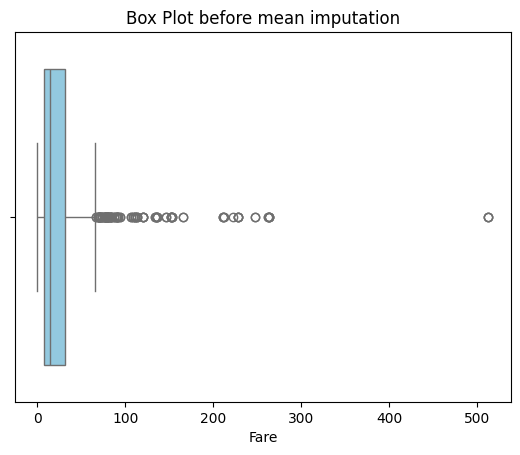

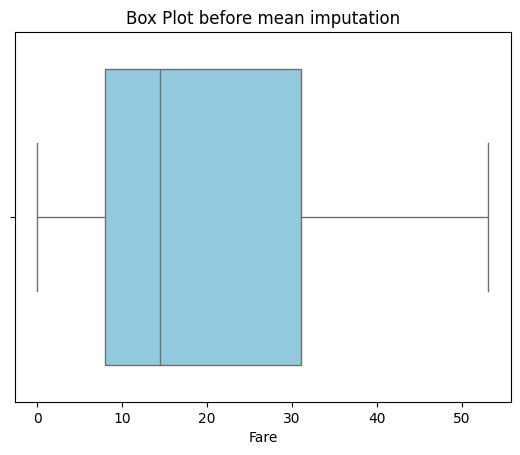

In [59]:
#mean imputation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=train_titanic['Fare'],color="skyblue")
plt.title('Box Plot before mean imputation')
plt.show()
lower_tail=(np.percentile(train_titanic['Fare'],25))-(1.5*(np.percentile(train_titanic['Fare'],75)))
upper_tail=(np.percentile(train_titanic['Fare'],25))+(1.5*(np.percentile(train_titanic['Fare'],75)))
m=np.mean(train_titanic['Fare'])
for i in train_titanic['Fare']:
  if i < lower_tail or i > upper_tail:
     train_titanic['Fare'] = train_titanic['Fare'].replace(i, m)
sns.boxplot(x=train_titanic['Fare'],color="skyblue")
plt.title('Box Plot before mean imputation')
plt.show()

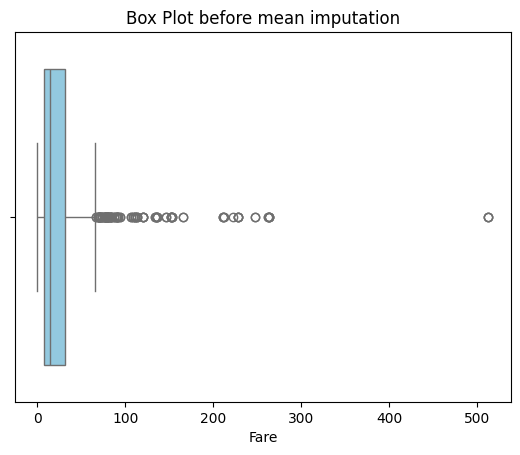

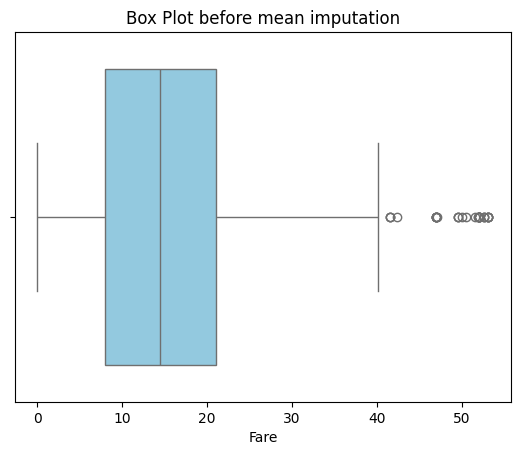

In [63]:
#meadian imputation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=train_titanic['Fare'],color="skyblue")
plt.title('Box Plot before mean imputation')
plt.show()
lower_tail=(np.percentile(train_titanic['Fare'],25))-(1.5*(np.percentile(train_titanic['Fare'],75)))
upper_tail=(np.percentile(train_titanic['Fare'],25))+(1.5*(np.percentile(train_titanic['Fare'],75)))
m=np.median(train_titanic['Fare'])
for i in train_titanic['Fare']:
  if i < lower_tail or i > upper_tail:
     train_titanic['Fare'] = train_titanic['Fare'].replace(i, m)
sns.boxplot(x=train_titanic['Fare'],color="skyblue")
plt.title('Box Plot before mean imputation')
plt.show()

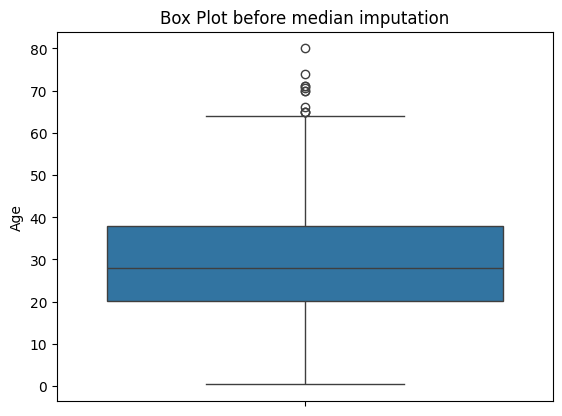

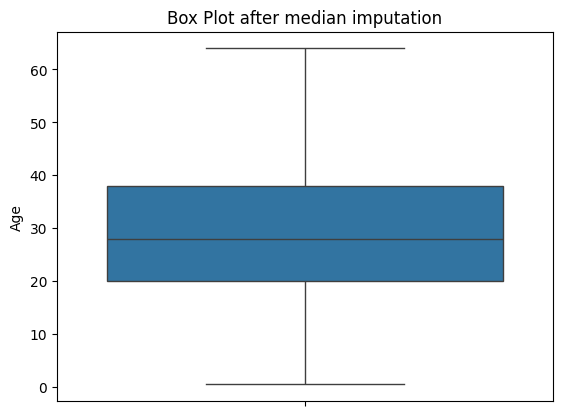

In [64]:
#median imputation
import pandas as pd
import numpy as np
train = pd.read_csv('/content/train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, med)
sns.boxplot(train['Age'])
plt.title("Box Plot after median imputation")
plt.show()

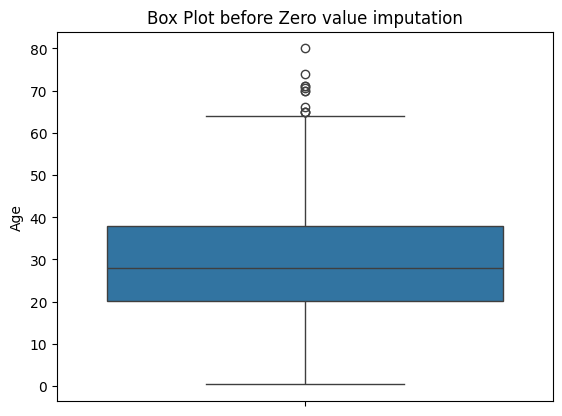

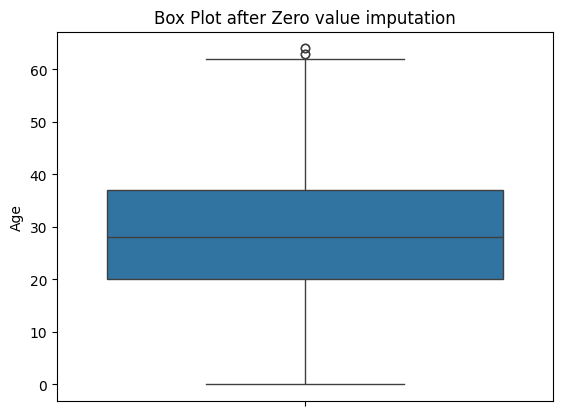

In [65]:
#Zero value imputation
import pandas as pd
import numpy as np
train = pd.read_csv('/content/train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, 0)
sns.boxplot(train['Age'])
plt.title("Box Plot after Zero value imputation")
plt.show()

#`Conclusion`

# 1. Median is best measure of central tendency when the data has outlier or skewed.
# 2. Winsorization Method or Percentile Capping is the better outlier detection technique the others.
# 3. Median imputation completely remove outlier.

# Outlier is one of the major problem in machine learning. If you neglect the outlier result with bad performance of the model. In this kernel I'm try to cover almost all the topics related to outliers, outlier detection, outlier treatment techniques.